# 1)


Desarrolla un programa que solicite al usuario el nombre de un archivo de Excel
en donde se tengan almacenados puntos experimentales; el programa deberá ser
capaz de cargar esos datos, graficarlos y calcular el polinomio de Lagrange
asociado tanto de manera compacta usando las funciones asociadas de MATLAB,
como de manera procedimental; los resultados serán mostrados en pantalla y
almacenados en un nuevo archivo de Excel.


In [156]:
# Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openpyxl import Workbook
from numpy.polynomial import Polynomial
import warnings

warnings.filterwarnings("ignore")

## Leer datos de exel


In [157]:
df = pd.read_excel("data.xlsx")

# Pedirle nombre del exel al usuario y cargarlo
while True:
    try:
        exel = input("Nombre del archivo de exel (data.xlsx)")
        df = pd.read_excel(exel)
        break
    except:
        print("Nombre invalido ")


# Leer puntos del exel
x = df["x"].values
y = df["y"].values

## Usando polyfit()


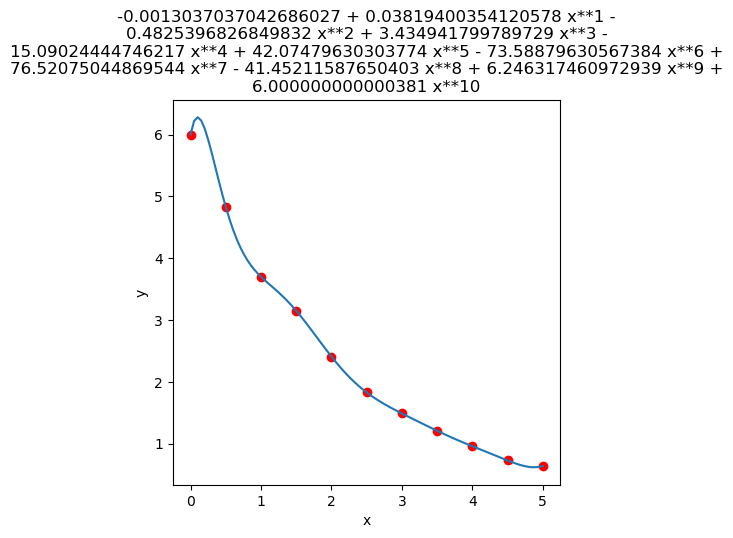

In [158]:
INTERVAL = np.linspace(0, 5, 100)

# Calcular el polinomio de Lagrange con la funcion polyfit
p = np.polyfit(x, y, deg=len(x) - 1)

# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=Polynomial(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    np.polyval(p, INTERVAL),
)

fig.show()

## De manera procedimental


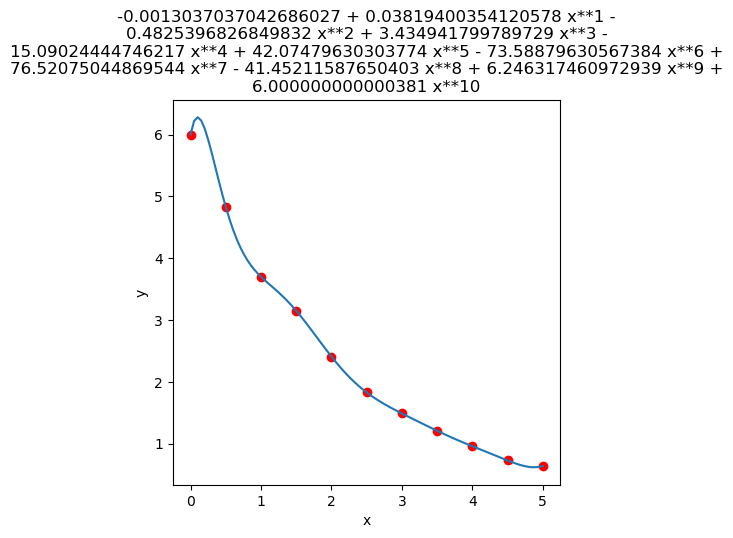

In [159]:
def lagrange(eval):
    n = len(x)  # Número de puntos
    result = 0  # Resultado final

    for i in range(n):
        term = y[i]  # Término actual del polinomio de Lagrange
        for j in range(n):
            if j != i:
                term = (
                    term * (eval - x[j]) / (x[i] - x[j])
                )  # Producto de términos individuales

        result += term  # Agregar el término al resultado final

    return result  # Devolver el resultado


# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title=Polynomial(p), xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(x, y, c="r")

# Plotear puntos con el polinomio de Lagrange
ax.plot(
    INTERVAL,
    list(
        map(lagrange, INTERVAL),
    ),
)

fig.show()

## Salvar resultados a exel


In [160]:
# Guardar los resultados en el archivo de Excel
pd.DataFrame({"x": INTERVAL, "y": list(map(lagrange, INTERVAL))}).to_excel(
    "output1.xlsx", index=False
)

# 2)


Realiza un programa que haga lo mismo que el punto anterior, pero que sea capaz
de ajustar los datos a diversos modelos funcionales (potencias, logaritmos,
exponenciales y funciones recíprocas) Los resultados deben de poderse
almacenar en un archivo de Excel, de igual manera deben de graficarse, tanto los
puntos experimentales como los ajustes, con etiquetas que indiquen la ecuación
del modelo obtenido. El programa, a petición del usuario, debe ser capaz de dar
un valor interpolado o extrapolado en base a un valor de x dado por el usuario.


In [161]:
df = pd.read_excel("data.xlsx")

# Pedirle nombre del exel al usuario y cargarlo
while True:
    try:
        exel = input("Nombre del archivo de exel (data.xlsx)")
        df = pd.read_excel(exel)
        break
    except:
        print("Nombre invalido ")


# Leer puntos del exel
x = df["x"].values
y = df["y"].values

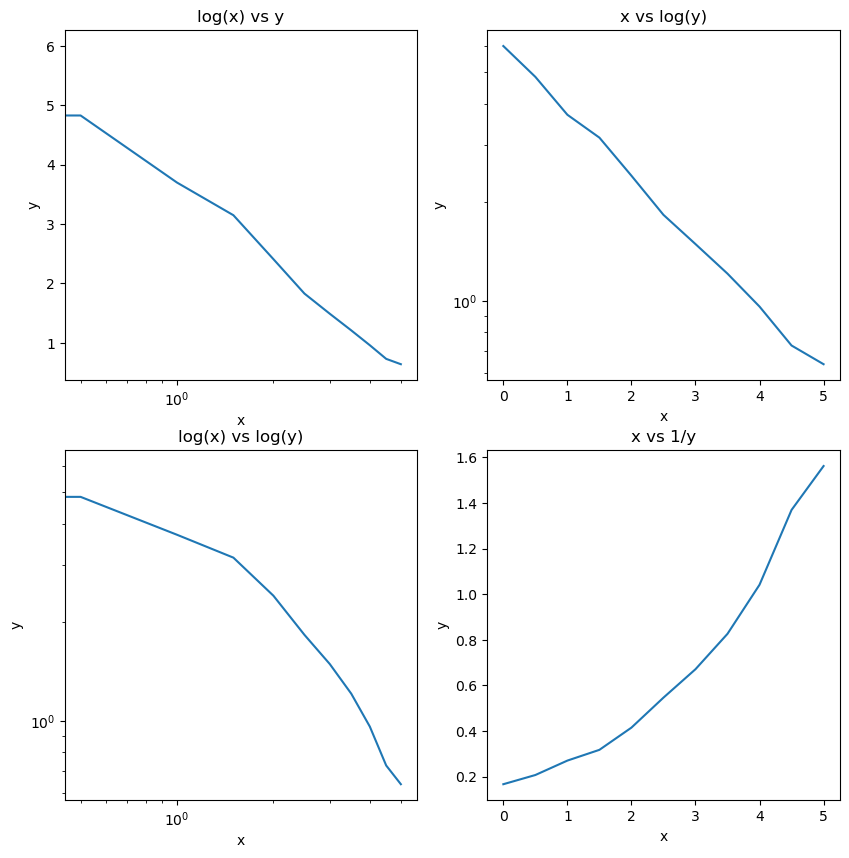

In [162]:
# Crear una figura con 2 filas y 2 columnas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Gráfico 1: log(x) vs y
ax[0, 0].set(title="log(x) vs y", xlabel="x", ylabel="y")
ax[0, 0].semilogx(x, y)

# Gráfico 2: x vs log(y)
ax[0, 1].set(title="x vs log(y)", xlabel="x", ylabel="y")
ax[0, 1].semilogy(x, y)

# Gráfico 3: log(x) vs log(y)
ax[1, 0].set(title="log(x) vs log(y)", xlabel="x", ylabel="y")
ax[1, 0].loglog(x, y)

# Gráfico 4: x vs 1/y
ax[1, 1].set(title="x vs 1/y", xlabel="x", ylabel="y")
ax[1, 1].plot(x, 1 / y)


fig.show()

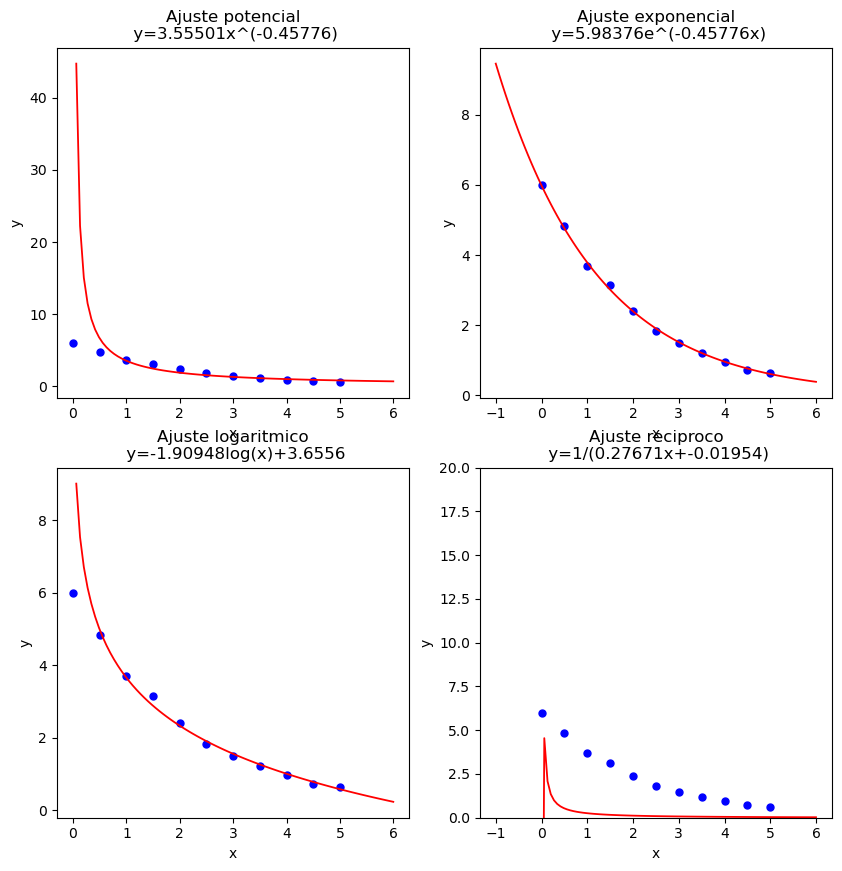

In [163]:
# Ajuste potencial
p_po = np.polyfit(np.log(x[(x > 0) & (y > 0)]), np.log(y[(x > 0) & (y > 0)]), 1)
m_po = p_po[0]
b_po = np.exp(p_po[1])
x_po = np.linspace(-1, 6, 100)
y_po = b_po * x_po**m_po

# Ajuste exponencial
p_ex = np.polyfit(x[(x > 0) & (y > 0)], np.log(y[(x > 0) & (y > 0)]), 1)
m_ex = p_ex[0]
b_ex = np.exp(p_ex[1])
x_ex = np.linspace(-1, 6, 100)
y_ex = b_ex * np.exp(m_ex * x_ex)

# Ajuste logaritmico
p_lo = np.polyfit(np.log(x[(x > 0) & (y > 0)]), y[(x > 0) & (y > 0)], 1)
m_lo = p_lo[0]
b_lo = p_lo[1]
x_lo = np.linspace(-1, 6, 100)
y_lo = b_lo + m_lo * np.log(x_lo)

# Ajuste reciproco
p_re = np.polyfit(x[y != 0], 1 / y[y != 0], 1)
m_re = p_re[0]
b_re = p_re[1]
x_re = np.linspace(-1, 6, 100)
y_re = m_re / x_re + b_re


# Crear una figura con 2 filas y 2 columnas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Gráfico 1: Ajuste potencial
ax[0, 0].set(
    title=f"Ajuste potencial\n y={round(b_po,5)}x^({round(m_ex,5)})",
    xlabel="x",
    ylabel="y",
)
ax[0, 0].scatter(x, y, color="blue", marker="o", facecolors="blue", s=25)
ax[0, 0].plot(
    x_po,
    y_po,
    linewidth=1.3,
    color="red",
)


# Gráfico 2: Ajuste exponencial
ax[0, 1].set(
    title=f"Ajuste exponencial\n y={round(b_ex,5)}e^({round(m_ex,5)}x)",
    xlabel="x",
    ylabel="y",
)
ax[0, 1].scatter(x, y, color="blue", marker="o", facecolors="blue", s=25)
ax[0, 1].plot(
    x_ex,
    y_ex,
    linewidth=1.3,
    color="red",
)


# Gráfico 3: Ajuste logaritmico
ax[1, 0].set(
    title=f"Ajuste logaritmico\n y={round(m_lo,5)}log(x)+{round(b_lo,5)}",
    xlabel="x",
    ylabel="y",
)
ax[1, 0].scatter(x, y, color="blue", marker="o", facecolors="blue", s=25)
ax[1, 0].plot(
    x_lo,
    y_lo,
    linewidth=1.3,
    color="red",
)


# Gráfico 4: Ajuste reciproco
ax[1, 1].set(
    title=f"Ajuste reciproco\n y=1/({round(m_re,5)}x+{round(b_re,5)})",
    xlabel="x",
    ylabel="y",
    ylim=(0, 20),
)

ax[1, 1].scatter(x, y, color="blue", marker="o", facecolors="blue", s=25)
ax[1, 1].plot(
    x_re,
    y_re,
    linewidth=1.3,
    color="red",
)

fig.show()

## Salvar resultados a exel


In [164]:
# Guardar los resultados de el ajuste exponencial ya que es el que mejor se ajusta
pd.DataFrame({"x": x_ex, "y": y_ex}).to_excel("output2.xlsx", index=False)

# 3)


Construye un programa que ajuste datos leídos de Excel mediante el método de
regresión por mínimos cuadrados. Tu programa debe de graficar la recta
producida, mostrar los valores de los factores de ajuste, así como sus
incertidumbres y graficar los residuos. Usando los datos de la siguiente tabla,
comprueba el funcionamiento de tu programa:

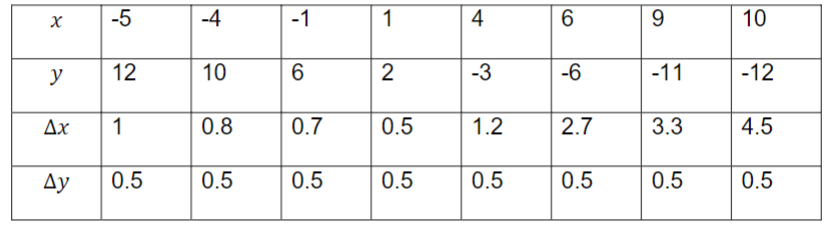


## Leer datos de Exel


In [165]:
# Leer y extraer datos del exel
df = pd.read_excel("data2.xlsx")
data_x = df["x"].values
data_y = df["y"].values
data_err_x = df["dx"].values
data_err_y = df["dy"].values


# Preparar datos
sets = [
    list(zip(data_x + data_err_x, data_y + data_err_y)),
    list(zip(data_x + data_err_x, data_y - data_err_y)),
    list(zip(data_x - data_err_x, data_y - data_err_y)),
    list(zip(data_x - data_err_x, data_y + data_err_y)),
]

## Calcular los valores B


In [166]:
# lista para guardar los valoores de b
b_vals = []

# Iterar sobre cada set de puntos
for data_set in sets:
    x_values, y_values = zip(*data_set)  # Separar x, y en 2 variables
    x_mat = np.ones((len(data_set), 2))  # Crear matriz con puros 1
    x_mat[:, 1] = x_values  # Cambiar valores de la 2nda columna a los de x
    x_mat_t = np.transpose(x_mat)  # crear matriz transpuesta

    y_mat = np.array(y_values)  # crear matriz de "y"

    # calcular B
    b = np.matmul(np.linalg.inv(np.matmul(x_mat_t, x_mat)), np.matmul(x_mat_t, y_mat))

    # agregar los valores de b a la lista
    b_vals.append((b[0], b[1]))

## Graficar resultados


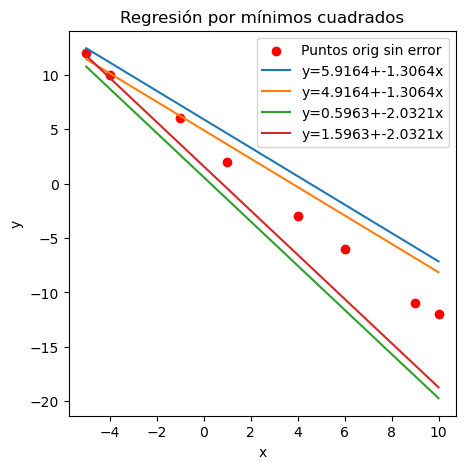

In [167]:
# Crear plot
fig, ax = plt.subplots(figsize=(5, 5))

# Configuracion de plot
ax.set(title="Regresión por mínimos cuadrados", xlabel="x", ylabel="y")

# Plotear puntos de exel
ax.scatter(data_x, data_y, c="r", label="Puntos orig sin error")

# Plotear
for b in b_vals:
    x = np.linspace(np.min(data_x), np.max(data_x), 100)
    y = b[0] + b[1] * x
    ax.plot(x, y, label=f"y={round(b[0],4)}+{round(b[1],4)}x")

# Agregar leyenda a grafica
ax.legend()

fig.show()